In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import time, shutil, os
import scipy
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import pylab as plt

In [17]:
def plot_results(exp_name, n, title = ""):
    orig_dist = []
    orig_dist_std = []
    adv_dist = []
    adv_dist_std = []
    noise_dist = []
    recon_dist = []
    orig_target_dist = []
    target_recon_dist = []
    orig_target_recon_dist = []
    C = []

    for i in range(n):
            df = pd.read_csv("results/" + exp_name + "/exp_" + str(i) + ".csv")
            orig_dist.append(df['orig_dist'].values)
            orig_dist_std.append(df['orig_dist_std'].values)
            adv_dist.append(df['adv_dist'].values)
            adv_dist_std.append(df['adv_dist_std'].values)
            noise_dist.append(df['noise_dist'].values)
            recon_dist.append(df['recon_dist'].values)
            target_recon_dist.append(df['target_recon_dist'].values)
            orig_target_dist.append(df['orig_target_dist'].values)
            orig_target_recon_dist.append(df['orig_target_recon_dist'].values)
            C.append(df['C'].values)
            
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    npoints = len(orig_dist[0])

    for i in range(n):
        ax.plot(noise_dist[i]/orig_target_dist[i], [i]*npoints,
                (adv_dist[i] - target_recon_dist[i])/(orig_target_recon_dist[i]-target_recon_dist[i]), color = 'r', alpha = 0.5)

    ax.set_xlabel('Adversarial distortion')
    ax.set_ylabel('Experiment')
    ax.set_zlabel('Adversarial reconstruction - Target')
    fig.set_figwidth(8)
    fig.set_figheight(6)
    plt.title(title)
    plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    npoints = len(orig_dist[0])

    for i in range(n):
        ax.plot((orig_dist[i] - orig_recon_dist[i]), [i]*npoints, (adv_dist[i] - target_recon_dist[i])/(orig_target_recon_dist[i]-target_recon_dist[i]), color = 'r', alpha = 0.5)

    ax.set_xlabel('Adversarial reconstruction - Original')
    ax.set_ylabel('Experiment')
    ax.set_zlabel('Adversarial reconstruction - Target')
    fig.set_figwidth(9)
    fig.set_figheight(6)
    plt.title(title)

    plt.show()
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    npoints = len(orig_dist[0])
    
    for i in range(n):
        ax.plot([i]*npoints, noise_dist[i]/orig_target_dist[i], recon_dist[i]/orig_target_recon_dist[i], color = 'r', alpha = 0.5)

    ax.set_ylabel('Adversarial distortion')
    ax.set_xlabel('Experiment')
    ax.set_zlabel('Adversarial reconstruction - Adversarial input')
    fig.set_figwidth(9)
    fig.set_figheight(6)
    plt.title(title)

    plt.show()

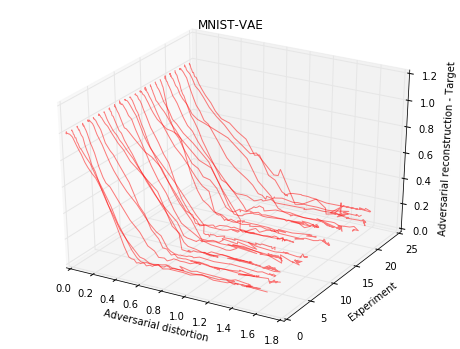

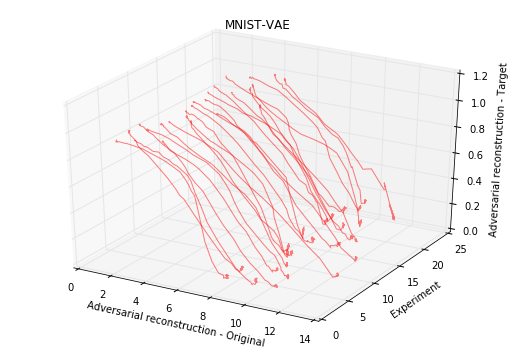

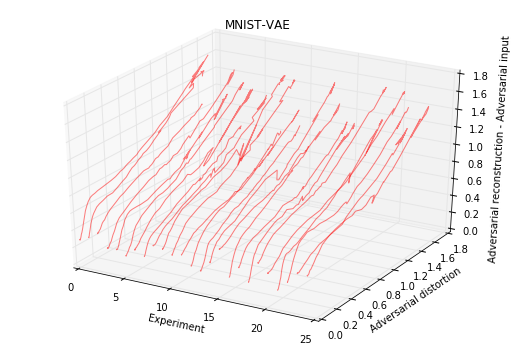

In [18]:
plot_results("mnist_vae", 25, "MNIST-VAE")

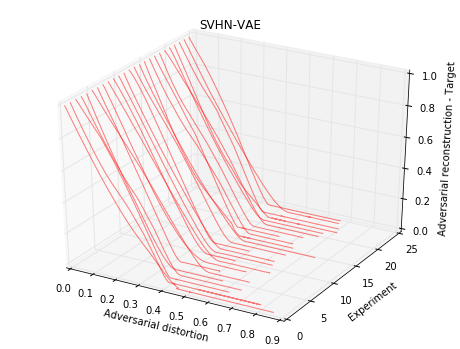

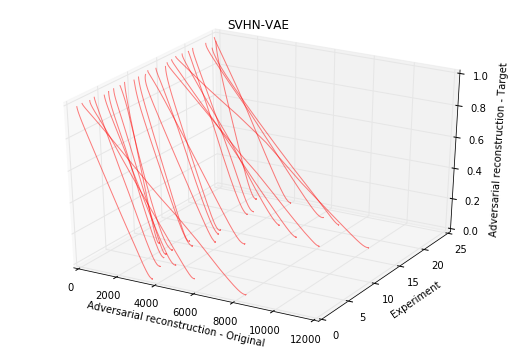

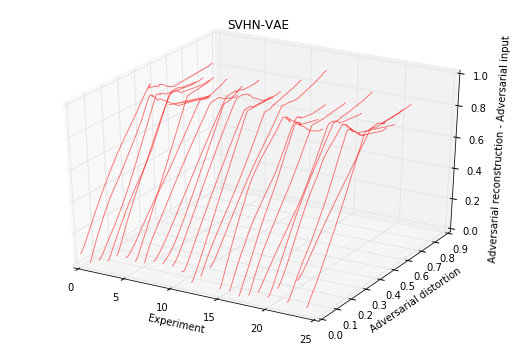

In [19]:
plot_results("svhn_conv_vae", 25, "SVHN-VAE")